Для финального проекта я выбрала dataset https://www.kaggle.com/artimule/drinking-water-probability

Регрессивный анализ.

Dataset содержит информацию о той или иной воде. Целевая переменная - Potability, которая говорит нам, пригодна ли вода для пить или нет.


Питьевая вода очень важна для любого человека и от качества воды во многом зависит и наше самочувствие. 

Я попробую обучить разные модели и посмотрим на их результаты.

In [ ]:
! unzip archive.zip

Archive:  archive.zip
  inflating: drinking_water_potability.csv  


In [ ]:
!pip install dataprep

     |████████████████████████████████| 1.8 MB 33.3 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 719 kB 40.5 MB/s 
     |████████████████████████████████| 366 kB 45.0 MB/s 
     |████████████████████████████████| 1.3 MB 41.1 MB/s 
     |████████████████████████████████| 10.1 MB 52.7 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 1.5 MB 27.0 MB/s 
     |████████████████████████████████| 848 kB 38.5 MB/s 
     |████████████████████████████████| 160 kB 55.5 MB/s 
     |████████████████████████████████| 271 kB 53.5 MB/s 
     |████████████████████████████████| 125 kB 62.6 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 1.5 MB 27.4 MB/s 
     |████████████████████████████████| 743 kB 42.2 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=f9eb4bd14287790d34fc50b651624498a2878620fdccf9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

from dataprep.eda import *
from sklearn import metrics
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, accuracy_score, plot_roc_curve, f1_score, classification_report, log_loss, precision_score, recall_score, plot_precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('/content/drinking_water_potability.csv')

In [ ]:
df.head().style.background_gradient(axis=0)

In [ ]:
df.shape

(3276, 10)

Можно увидеть, что в некоторых колонках есть пустые значения

Все колонки уже нужного типа (int, float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Дубликатов нет

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(3276, 10)

Статистическая информация -
средние, медианные, поцентильные и тд значения


In [ ]:
df.describe().style.background_gradient(axis=0)

А вот и пустые значения, которые в дальнейшем могу нам помешать

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Заменим пустые значения на медиану для каждой колонки


In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())


Пустых значений нет

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
print('минимальное значени целевой переменной- ',df['ph'].min(),
      'максимальное значение целевой переменной- ', df['ph'].max())


минимальное значени целевой переменной-  0.0 максимальное значение целевой переменной-  14.0


Уникальные значения

In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

Посмотрим еще раз на типы данных

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Баланс классов целевой переменной

набор данных не полностью сбалансирован, это может вызвать проблемы

Text(0.5, 1.0, 'Count of Potability')

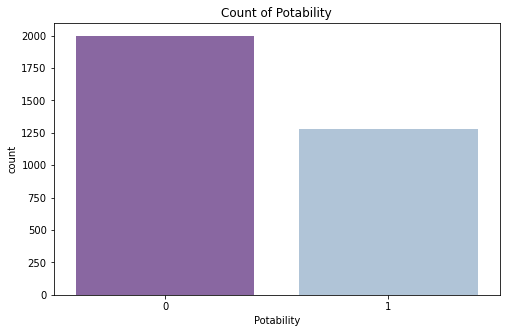

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x =df.Potability, palette='BuPu_r')
plt.title('Count of Potability')

Распределение значений для каждой функции


Видно, что все функции попадают в нормальное распределение, за исключением некоторых, которые немного смещены в стороны

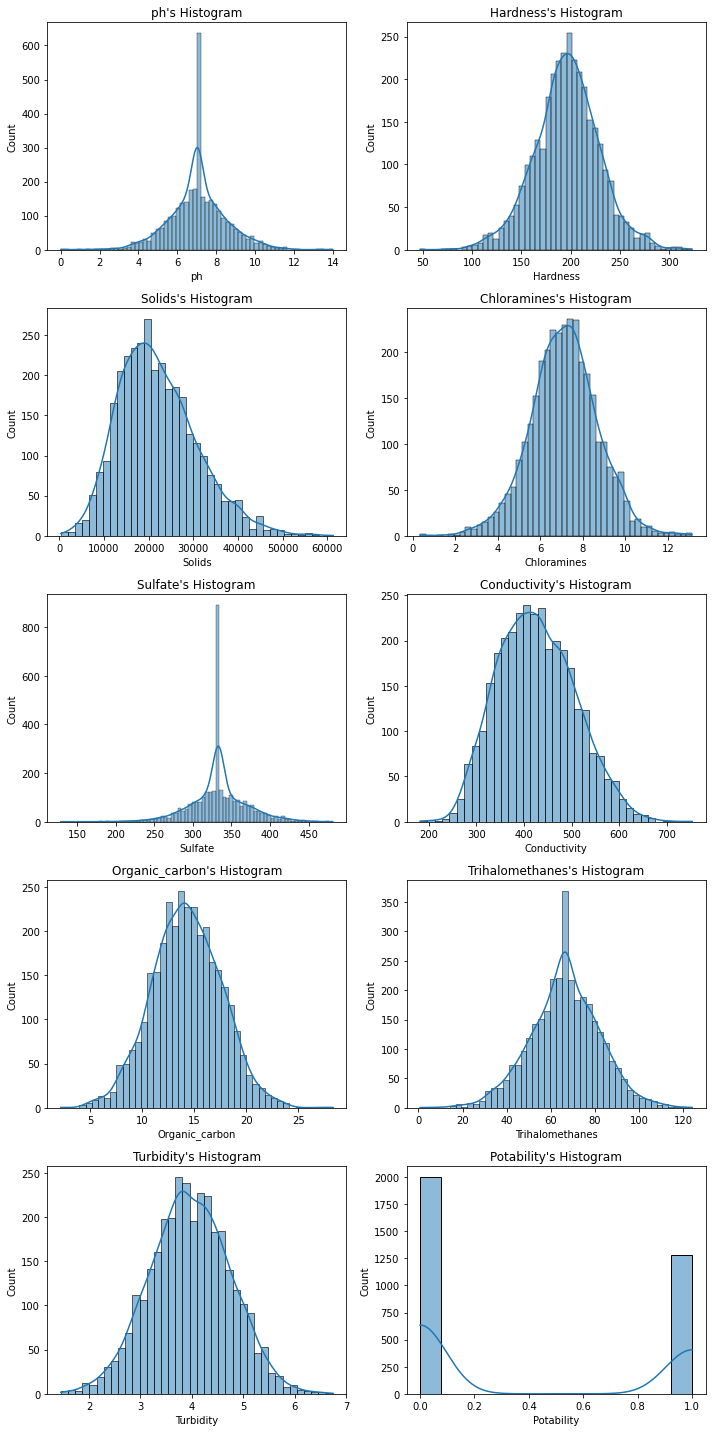

In [ ]:
plt.figure(figsize=(10,20))

for n, column in enumerate(df.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

Так же можем полную интересующую нас визуализацию с помочью DataPrep

DataPrep Report
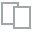
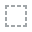
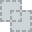
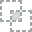
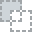
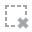
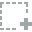
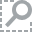
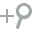
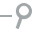
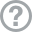
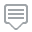
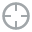
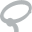
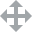
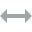
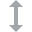
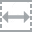
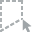
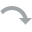
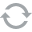
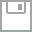
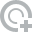
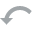
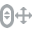
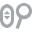
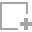
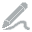
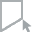
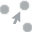
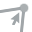
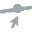

In [ ]:
create_report(df)

#EDA

С помощью Bpxplot посмотрим, где есть выбросы.

отображения сводки набора значений данных, имеющий такие свойства как  - минимум, первый квартиль, медиана, третий квартиль и максимум.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

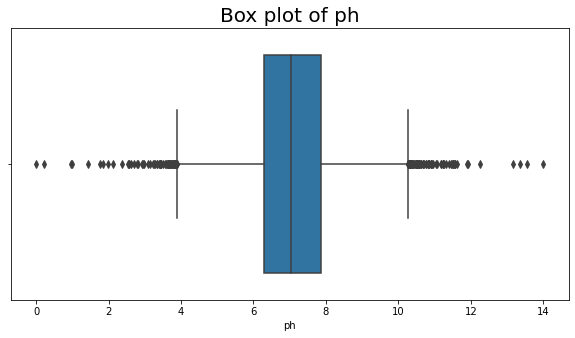

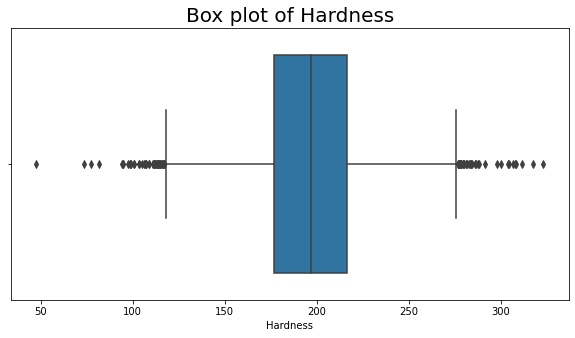

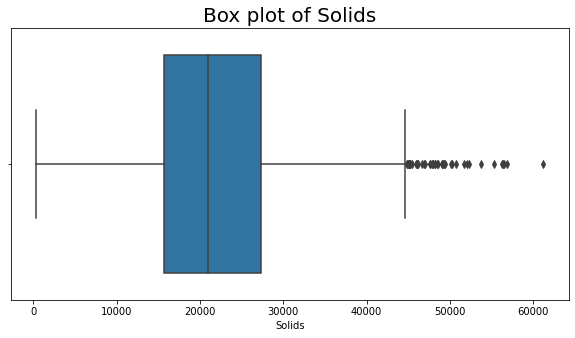

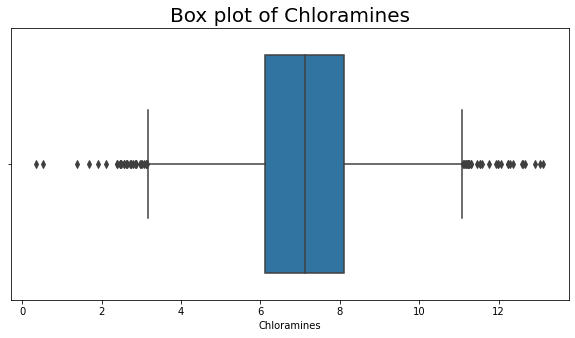

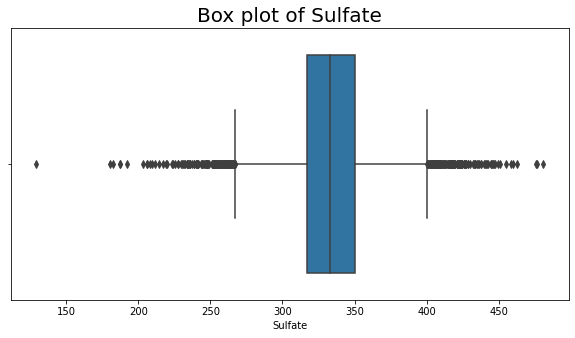

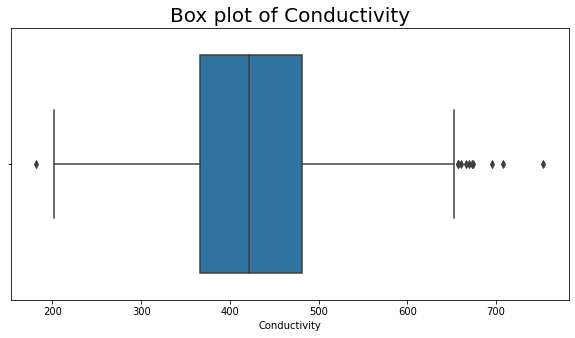

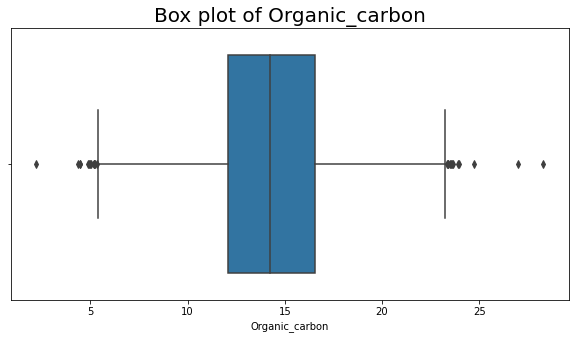

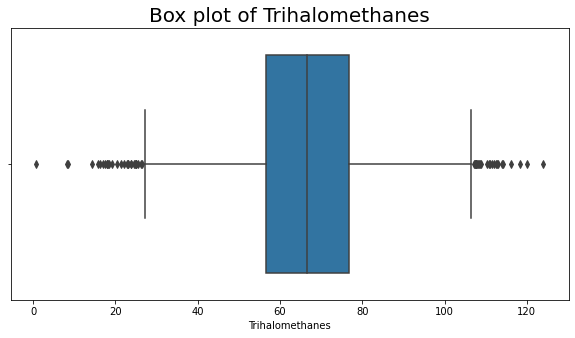

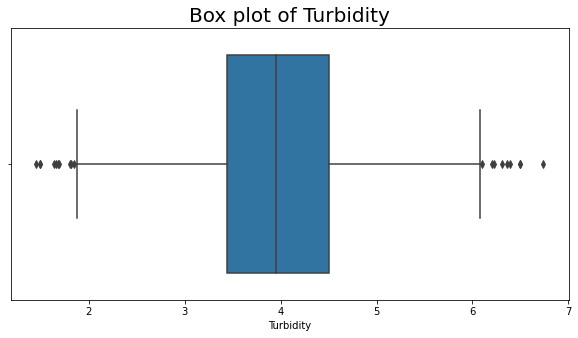

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)

Выбросы есть везде.

Устраним их при помощь IQR

In [ ]:
def emissions(col):
  q1 = df[col].quantile(q=0.25)
  q3 = df[col].quantile(q=0.75)
  k = 1.5
  iqr = q3-q1
  l = q1 - k * iqr
  u = q3 + k * iqr
  i = df[(df[col] < l)|(df[col] > u)][col].index
  df.loc[i, col] = df[col].mean()

for c in df.columns[:-1]:
  emissions(c)

Матриция корреляции

По корреляции можно сказать, что особо ничего не коррелирует.

Text(0.5, 1.0, 'Correlation Matrix')

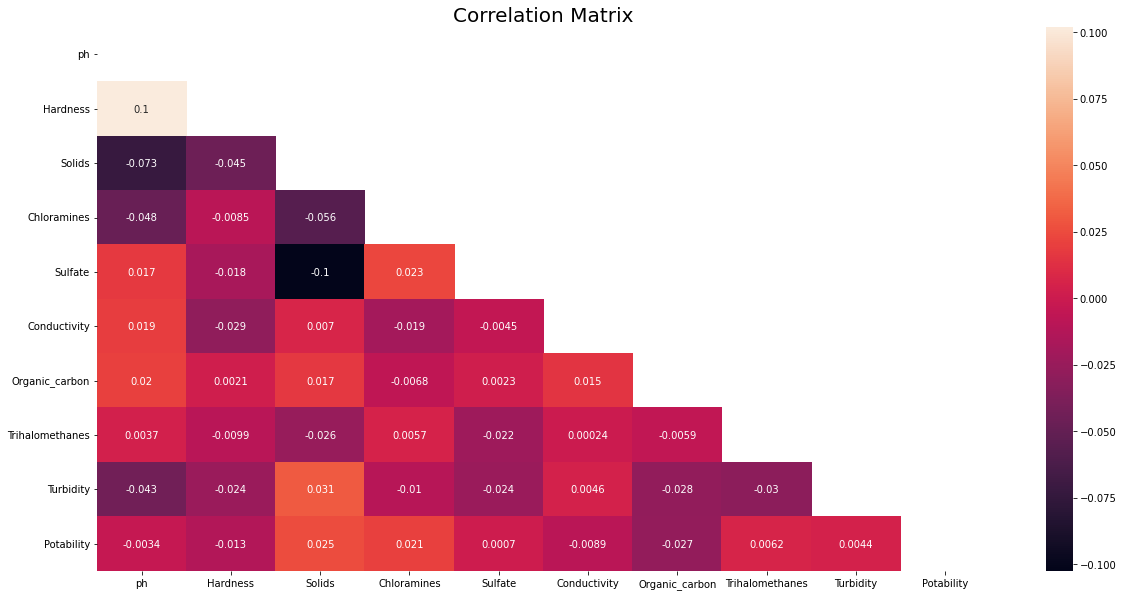

In [ ]:
plt.figure(figsize=(20, 10))
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix)
plt.title('Correlation Matrix',fontsize=20)

In [ ]:
df.corr()

ph  Hardness  ...  Turbidity  Potability
ph               1.000000  0.101794  ...  -0.042862   -0.003366
Hardness         0.101794  1.000000  ...  -0.023681   -0.012890
Solids          -0.072528 -0.045394  ...   0.031168    0.025442
Chloramines     -0.047927 -0.008548  ...  -0.010281    0.021017
Sulfate          0.017451 -0.017581  ...  -0.023886    0.000696
Conductivity     0.019022 -0.028889  ...   0.004582   -0.008891
Organic_carbon   0.020476  0.002097  ...  -0.028026   -0.027299
Trihalomethanes  0.003697 -0.009930  ...  -0.029985    0.006246
Turbidity       -0.042862 -0.023681  ...   1.000000    0.004441
Potability      -0.003366 -0.012890  ...   0.004441    1.000000

[10 rows x 10 columns]

Обозначим X && y

In [ ]:
X = df.drop(columns='Potability')
y = df['Potability']

Промаштабируем данные.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Разделение данных между обучением и тестированием

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(X_test.shape, X_train.shape)

(983, 9) (2293, 9)


Модели для обучения

Все модели подходят для регрессивного анализа.

1. Логистическая регрессия
2. KNN - метод ближайших соседей
3. SVM - метод опорных векторов
4. Decision Tree
5. Random Forest
6. Ada Boost
7. GNB - наивный Байесовский классификатор

In [ ]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNeighbors' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(), 
    'Ada Boost' : AdaBoostClassifier(),
    'GNB': GaussianNB()  
}

Соберем в dataframe резултаты по обучению каждой модели.

Классификатор Random Forest был наиболее точным в своих прогнозах, сохраняя при этом самые низкие оценки логарифмических потерь - logloss.

Хотя модель дала отличные результаты при прогнозировании обучающих данных, прогнозирование тестовых данных показало значительно худшую производительность, что указывает на переоснащение.

In [ ]:
train_acc = []
test_acc = []
train_logloss = []
test_logloss = []
train_rocauc = []
test_rocauc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_acc.append(round(accuracy_score(y_train, y_train_hat)*100, 2))
    test_acc.append(round(accuracy_score(y_test, y_test_hat)*100, 2))
    train_logloss.append(log_loss(y_train, y_train_hat))
    test_logloss.append(log_loss(y_test, y_test_hat))
    train_rocauc.append(round(roc_auc_score(y_train, y_train_hat), 2))
    test_rocauc.append(round(roc_auc_score(y_test, y_test_hat), 2))
    train_recall.append(round(recall_score(y_train, y_train_hat)*100, 2))
    test_recall.append(round(recall_score(y_test, y_test_hat)*100, 2))
    train_precision.append(round(precision_score(y_train, y_train_hat)*100, 2))
    test_precision.append(round(precision_score(y_test, y_test_hat)*100, 2))
    

result = pd.DataFrame({'Train Accuracy': train_acc, 'Test Accuracy': test_acc,
                        'Train Log Loss': train_logloss, 'Test Log Loss': test_logloss,
                        'Train ROC AUC': train_rocauc, 'Test ROC AUC': test_rocauc,
                        'Train Recall': train_recall, 'Test Recall': test_recall,
                        'Train Precision': train_precision, 'Test Precision': test_precision}, 
                   index=[name for name, model in models.items()])
result

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy  ...  Test Precision
Logistic Regression           60.53  ...            0.00
KNeighbors                    72.92  ...           44.59
SVM                           71.35  ...           54.09
Decision Tree                100.00  ...           41.60
Random Forest                100.00  ...           58.19
Ada Boost                     65.20  ...           43.83
GNB                           61.67  ...           50.00

[7 rows x 10 columns]

confusion_matrix для тестирующей и обучиющей вбыорки

<Figure size 720x720 with 0 Axes>

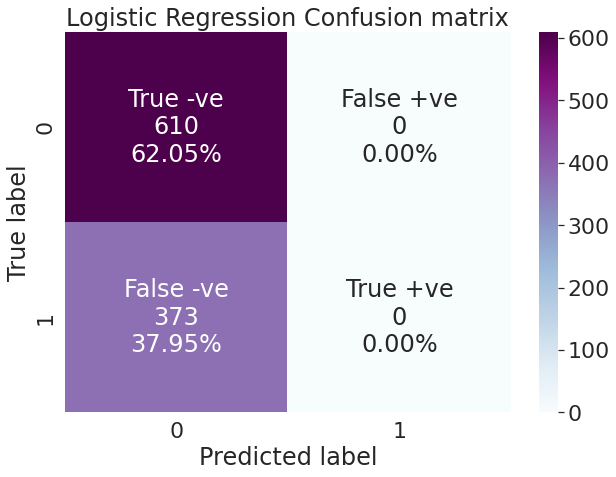

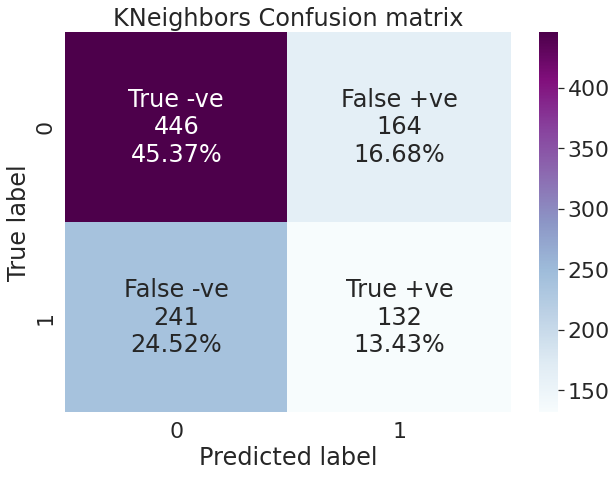

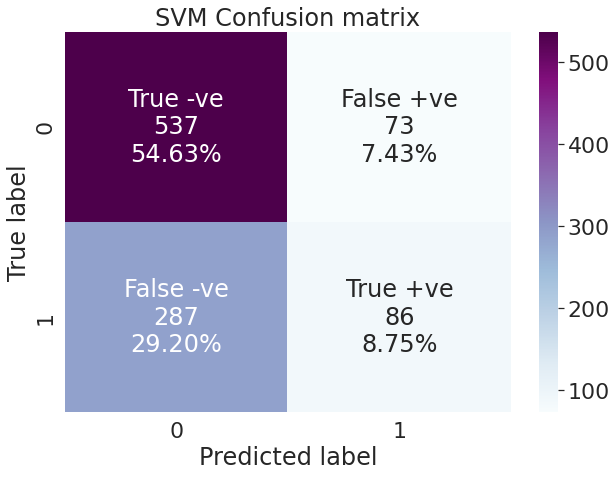

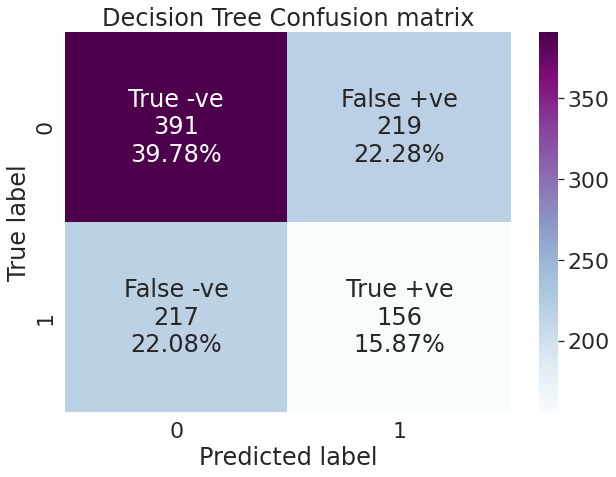

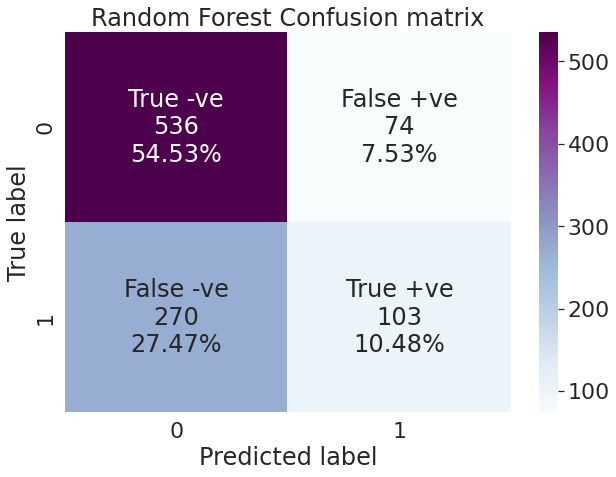

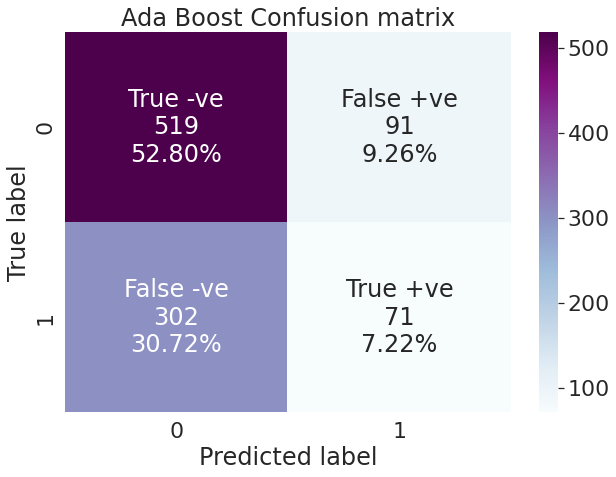

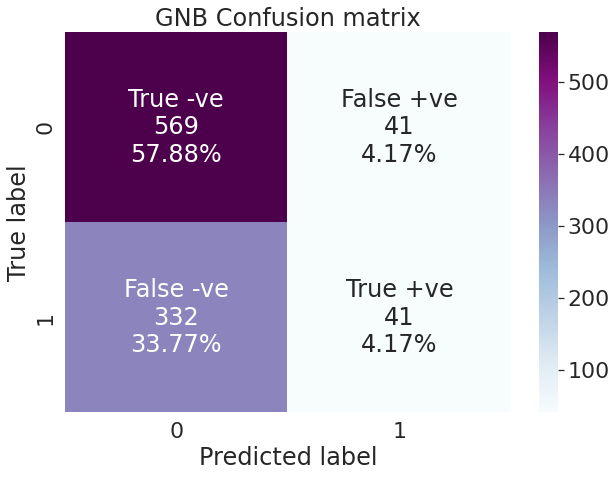

In [ ]:
def make_confusion_matrix(model,y_actual):
    sns.set(font_scale=2.0)
    y_predict = model.predict(X_test)
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='BuPu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(10,10))

for name, model in models.items():
  make_confusion_matrix(model, y_test)
  plt.title(f"{name} Confusion matrix")

plt.show()  

<Figure size 720x720 with 0 Axes>

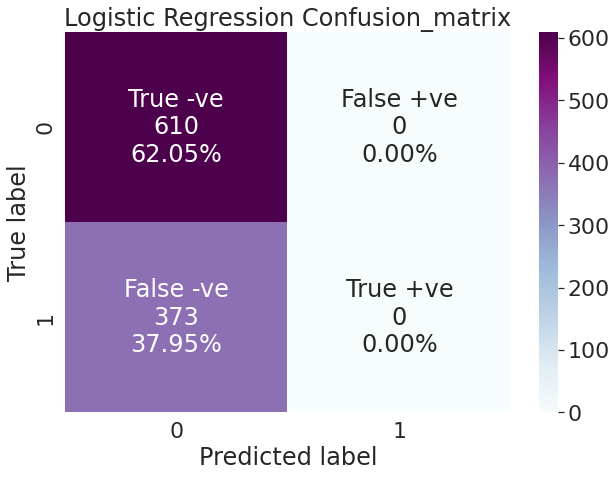

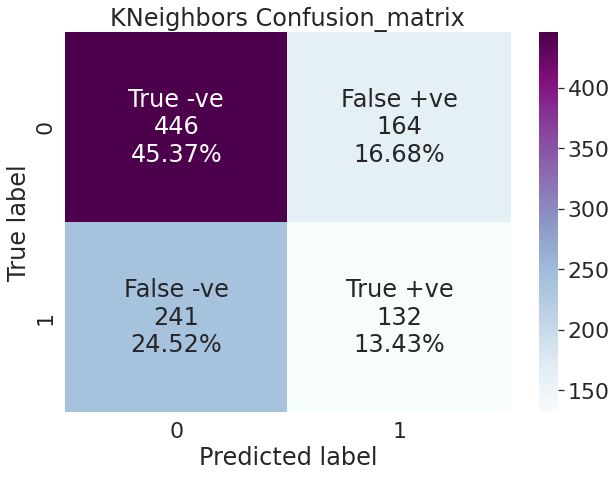

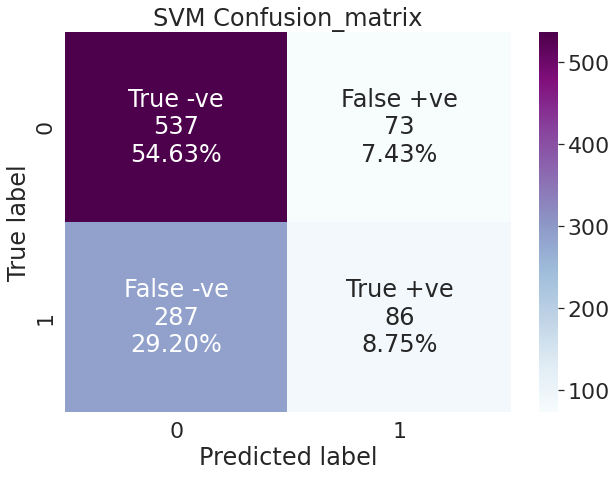

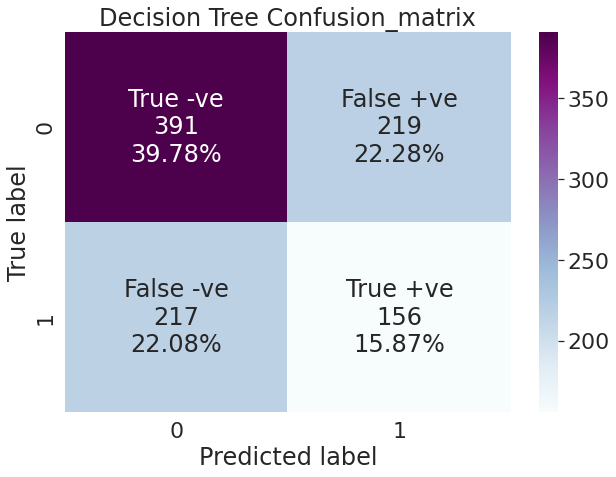

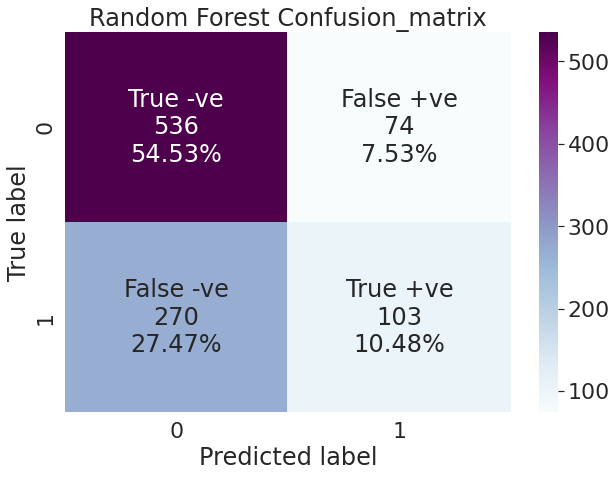

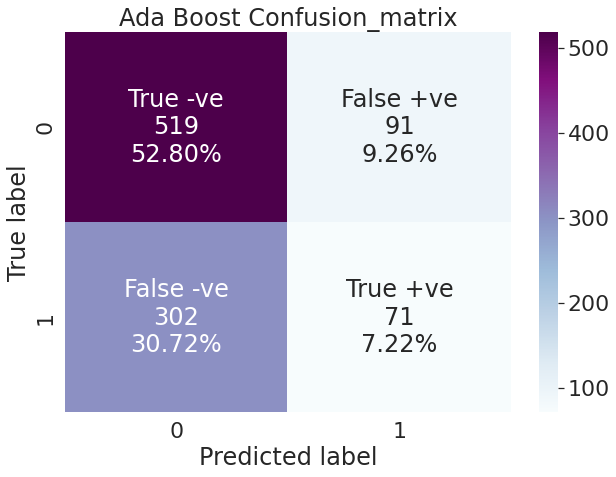

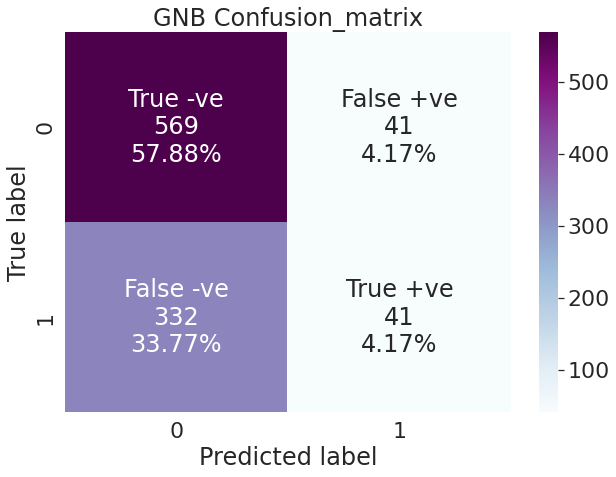

In [ ]:
plt.figure(figsize=(10,10))

for name, model in models.items():
  make_confusion_matrix(model, y_test)
  plt.title(f"{name} Confusion_matrix")

plt.show()  

Построение кривой точности

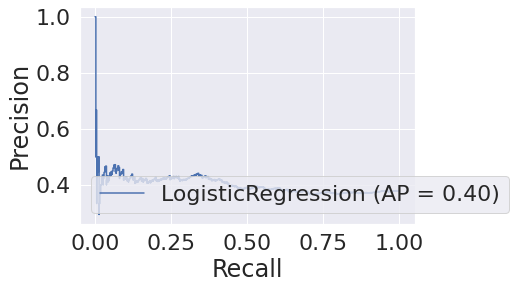

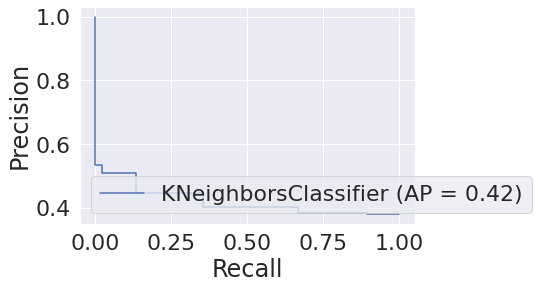

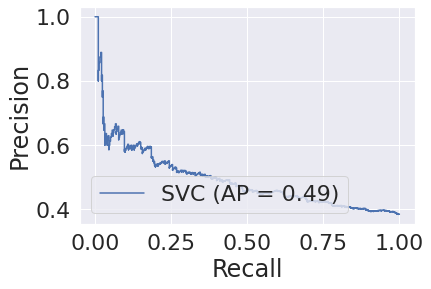

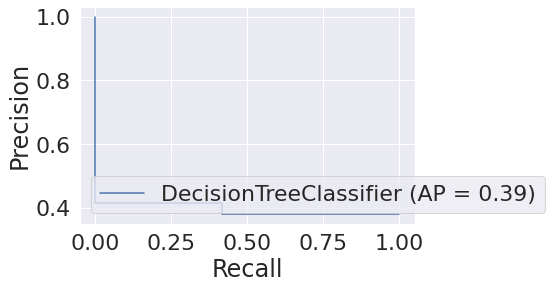

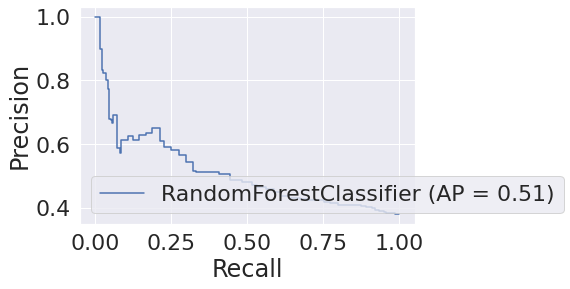

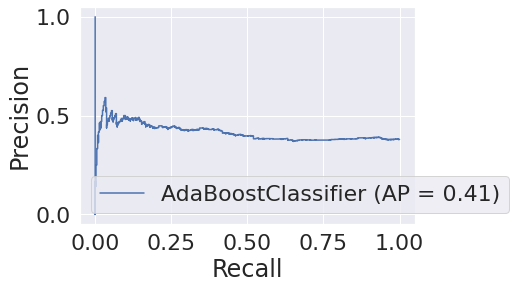

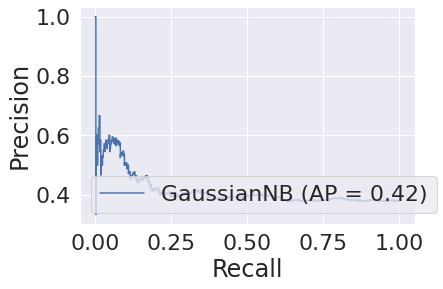

In [ ]:
for name, model in models.items():
  plot_precision_recall_curve(model,X_test,y_test)

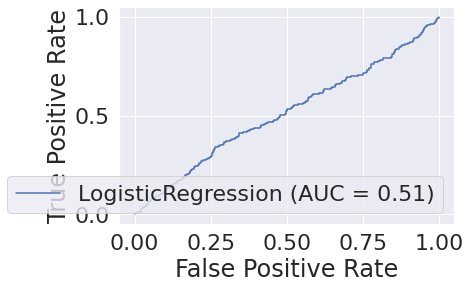

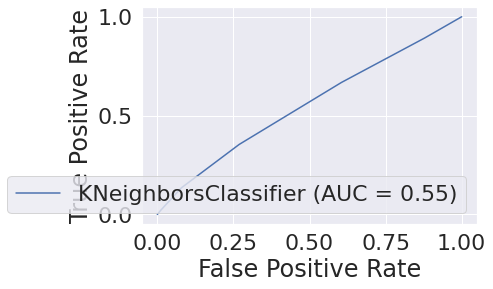

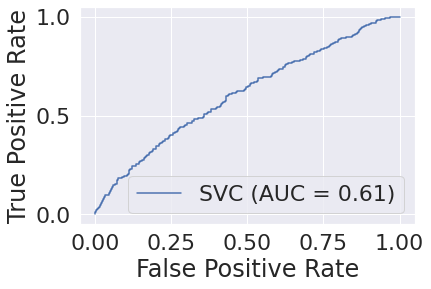

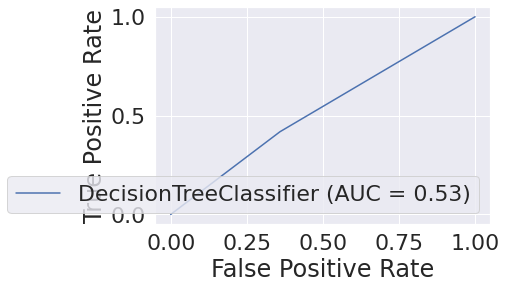

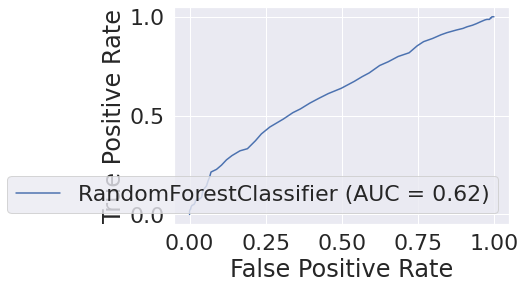

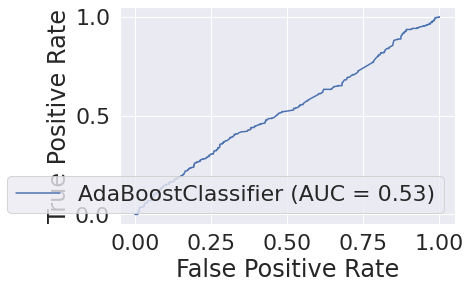

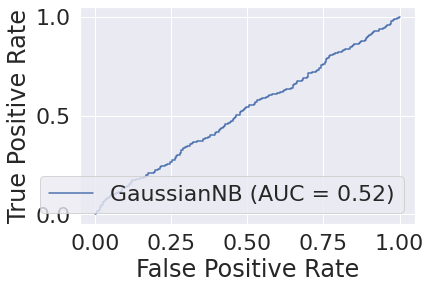

In [ ]:
for name, model in models.items():
  plot_roc_curve(model,X_test,y_test)

Визуализируем результаты.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Model Name')

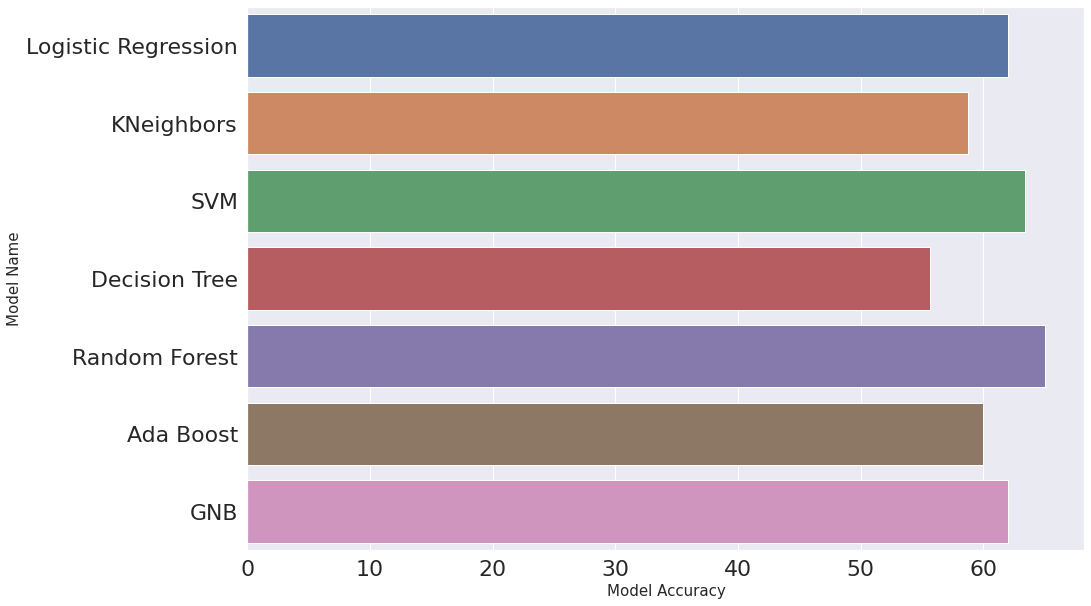

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(result['Test Accuracy'], result.index)
plt.xlabel('Model Accuracy', fontsize = 15)
plt.ylabel('Model Name', fontsize = 15)

Можно сделать вывод, что для получения более точных результатов на обучении тестовой выборки необходимо больше данных.

